In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("C:\\Users\\revan\\OneDrive\\Desktop\\datasets_for_python_projects\\socialmedia_dataanalysis.csv")
df

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,female,8,Instagram,Lifestlye,United Kingdom,Rural,Marketer Manager,18536,False,True,False
996,40,non-binary,6,YouTube,Travel,United Kingdom,Rural,Software Engineer,12711,True,False,False
997,27,non-binary,5,YouTube,Travel,United Kingdom,Rural,Student,17595,True,False,True
998,61,female,4,YouTube,Sports,Australia,Sub_Urban,Marketer Manager,16273,True,True,False


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           1000 non-null   int64 
 1   gender        1000 non-null   object
 2   time_spent    1000 non-null   int64 
 3   platform      1000 non-null   object
 4   interests     1000 non-null   object
 5   location      1000 non-null   object
 6   demographics  1000 non-null   object
 7   profession    1000 non-null   object
 8   income        1000 non-null   int64 
 9   indebt        1000 non-null   bool  
 10  isHomeOwner   1000 non-null   bool  
 11  Owns_Car      1000 non-null   bool  
dtypes: bool(3), int64(3), object(6)
memory usage: 73.4+ KB


In [3]:
df.head(10)

,age,gender,time_spent,platform,interests,location,demographics,profession,income,indebt,isHomeOwner,Owns_Car
0,56,male,3,Instagram,Sports,United Kingdom,Urban,Software Engineer,19774,True,False,False
1,46,female,2,Facebook,Travel,United Kingdom,Urban,Student,10564,True,True,True
2,32,male,8,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,13258,False,False,False
3,60,non-binary,5,Instagram,Travel,United Kingdom,Urban,Student,12500,False,True,False
4,25,male,1,Instagram,Lifestlye,Australia,Urban,Software Engineer,14566,False,True,True
5,38,male,3,Facebook,Travel,United States,Urban,Marketer Manager,19179,True,True,True
6,56,male,8,YouTube,Sports,United States,Urban,Student,16881,True,True,True
7,36,male,4,Instagram,Sports,Australia,Urban,Marketer Manager,13636,True,False,True
8,40,non-binary,7,YouTube,Lifestlye,Australia,Sub_Urban,Marketer Manager,16030,False,False,True
9,28,non-binary,2,Instagram,Sports,Australia,Sub_Urban,Marketer Manager,10223,True,False,True


In [5]:
df.shape

(1000, 12)

In [6]:
print(df.isnull().sum())

age             0
gender          0
time_spent      0
platform        0
interests       0
location        0
demographics    0
profession      0
income          0
indebt          0
isHomeOwner     0
Owns_Car        0
dtype: int64


In [7]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
               age   time_spent        income
count  1000.000000  1000.000000   1000.000000
mean     40.986000     5.029000  15014.823000
std      13.497852     2.537834   2958.628221
min      18.000000     1.000000  10012.000000
25%      29.000000     3.000000  12402.250000
50%      42.000000     5.000000  14904.500000
75%      52.000000     7.000000  17674.250000
max      64.000000     9.000000  19980.000000


In [9]:
popular_platform = df['platform'].value_counts().idxmax()
print(f"Most popular platform: {popular_platform}")

Most popular platform: Instagram


In [20]:
common_interests = df.groupby('demographics')['interests'].apply(lambda x: x.value_counts().idxmax())
print(common_interests)

demographics
Rural           Sports
Sub_Urban    Lifestlye
Urban           Travel
Name: interests, dtype: object


platform
Facebook     5.055375
Instagram    5.151515
YouTube      4.869697
Name: time_spent, dtype: float64


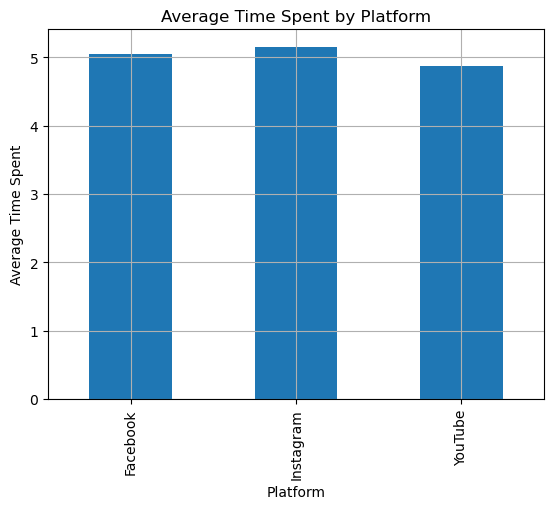

In [11]:
avg_time_spent = df.groupby('platform')['time_spent'].mean()
print(avg_time_spent)
avg_time_spent.plot(kind='bar', title='Average Time Spent by Platform')
plt.xlabel('Platform')
plt.grid()
plt.ylabel('Average Time Spent')
plt.show()

age_group
<18           NaN
18-25    5.203390
26-35    4.859375
36-45    5.225108
46-55    5.044843
56-65    4.762712
65+           NaN
Name: time_spent, dtype: float64


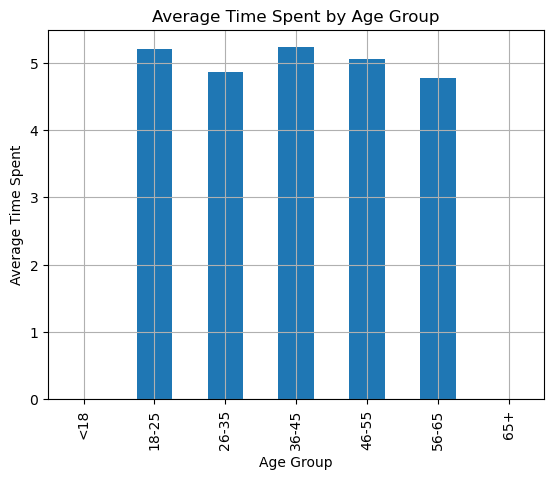

In [23]:
bins = [0, 17, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
avg_time_spent = df.groupby('age_group')['time_spent'].mean()
print(avg_time_spent)
avg_time_spent.plot(kind='bar', title='Average Time Spent by Age Group')
plt.xlabel('Age Group')
plt.grid()
plt.ylabel('Average Time Spent')
plt.show()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

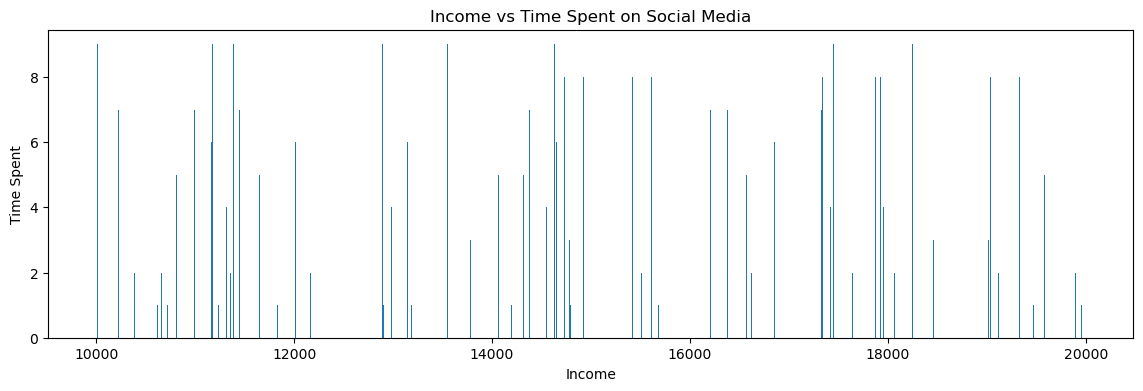

In [22]:
plt.figure(figsize=(14, 4))
plt.bar(df['income'], df['time_spent'])
plt.title('Income vs Time Spent on Social Media')
plt.xlabel('Income')
plt.ylabel('Time Spent')
plt.show()

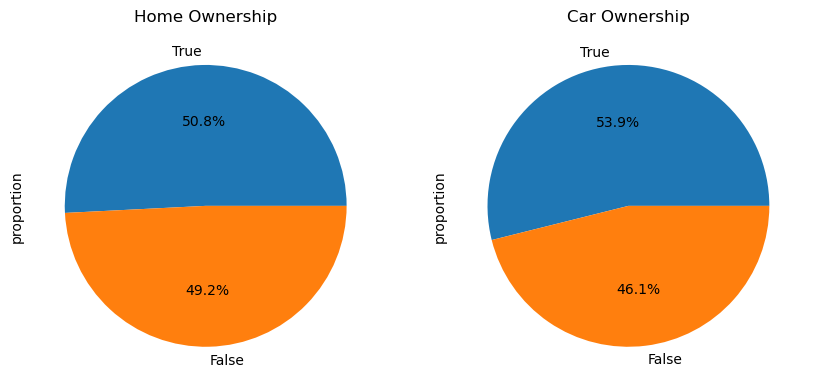

In [27]:
home_owners = df['isHomeOwner'].value_counts(normalize=True)
car_owners = df['Owns_Car'].value_counts(normalize=True)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
home_owners.plot(kind='pie', autopct='%1.1f%%', title='Home Ownership')

plt.subplot(1, 2, 2)
car_owners.plot(kind='pie', autopct='%1.1f%%', title='Car Ownership')
plt.show()

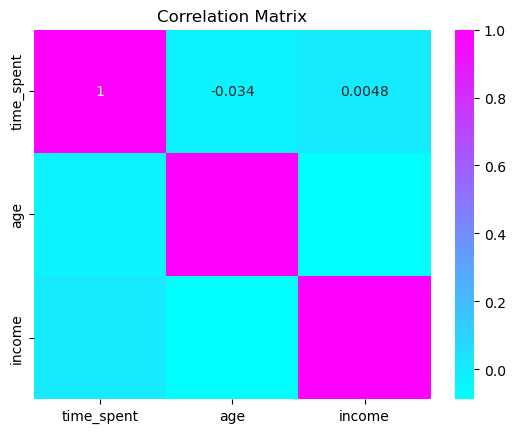

In [28]:
correlation_matrix = df[['time_spent', 'age', 'income']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.title('Correlation Matrix')
plt.show()

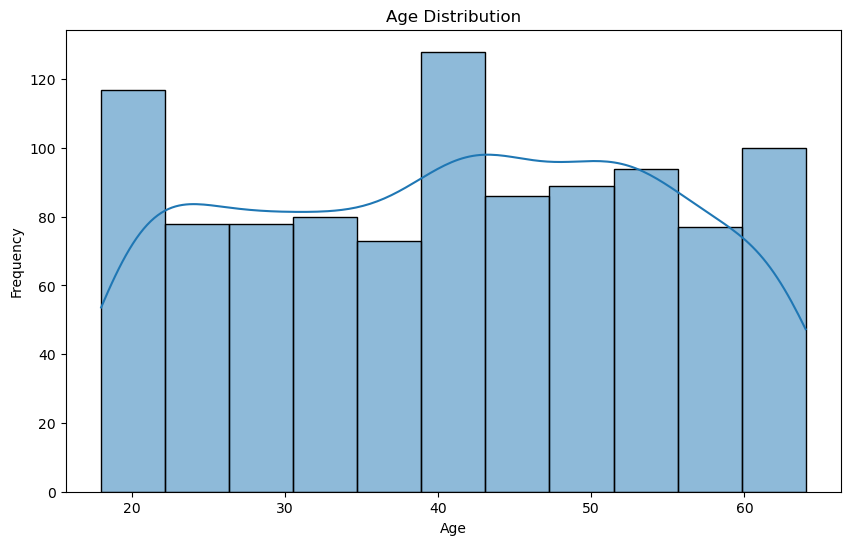

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


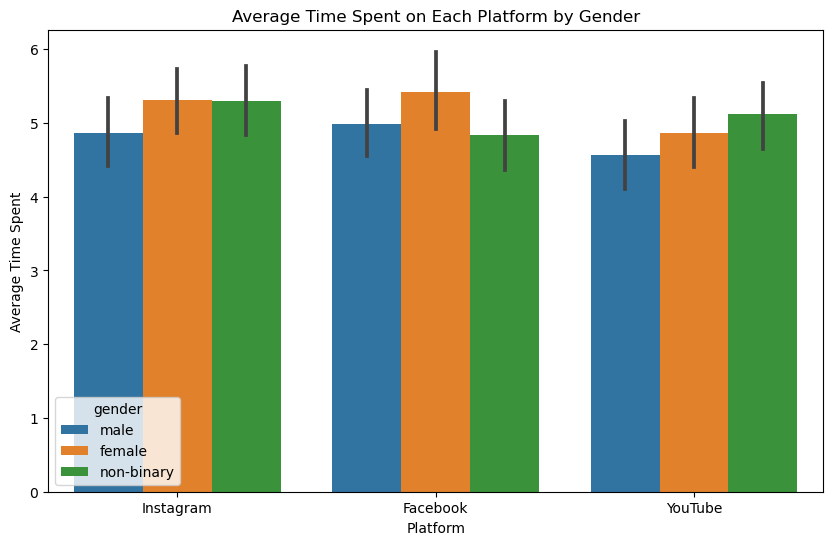

In [35]:


plt.figure(figsize=(10, 6))
sns.barplot(x='platform', y='time_spent', hue='gender', data=df)
plt.title('Average Time Spent on Each Platform by Gender')
plt.xlabel('Platform')
plt.ylabel('Average Time Spent')
plt.show()